In [35]:
'''Youtube-dl can convert YouTube Videos into MP3 files
   The videos has to be first downloaded as temporary files
   When done converting, these temporary files are automatically deleted
   See more about the package at: https://github.com/ytdl-org/youtube-dl/blob/master/README.md#faq
'''

'''Use the following line to install youtube-dl package
   Once installed, can comment out this line
'''
#!pip install youtube_dl

import youtube_dl
import os
from __future__ import unicode_literals

#url for mfcc testing
url = ['https://www.youtube.com/watch?v=8nvCN3-7vlA&t=18s','https://www.youtube.com/watch?v=SAdJI8xCghs']


def youtube_to_wav(urls):
  ''' Function uses the YouTube-dl library to convert YouTube videos to wav files
      Files share the same name as the name for the YouTube video
  '''
  k = 0
  ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'wav',
        'preferredquality': '192',
    }],
    'outtmpl': 'temp/' + str(k) +'.%(ext)s' 
  }
  for i in urls:
    #The YouTube Video will be converted into wav form with the youtube_dl library
    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
      ydl.download([i])
    k += 1
  return True

youtube_to_wav(url)

def rename_file():
  for files in os.listdir('.'):
    split_val = filename.split('-')

[youtube] 8nvCN3-7vlA: Downloading webpage
[youtube] 8nvCN3-7vlA: Downloading MPD manifest
[dashsegments] Total fragments: 13
[download] Destination: temp/0.webm
[download] 100% of 1.69MiB in 00:01
[ffmpeg] Destination: temp/0.wav
Deleting original file temp/0.webm (pass -k to keep)
[youtube] SAdJI8xCghs: Downloading webpage
[download] Destination: temp/0.m4a
[download] 100% of 1017.35KiB in 00:00
[ffmpeg] Correcting container in "temp/0.m4a"
[ffmpeg] Destination: temp/0.wav
Deleting original file temp/0.m4a (pass -k to keep)


In [36]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import wave
import sys

#!pip install python_speech_features
from python_speech_features import mfcc

def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

0.wav


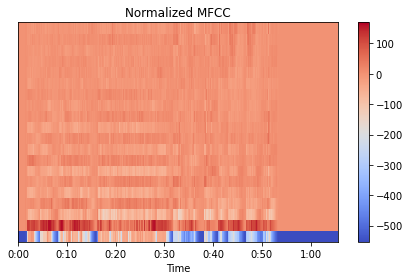

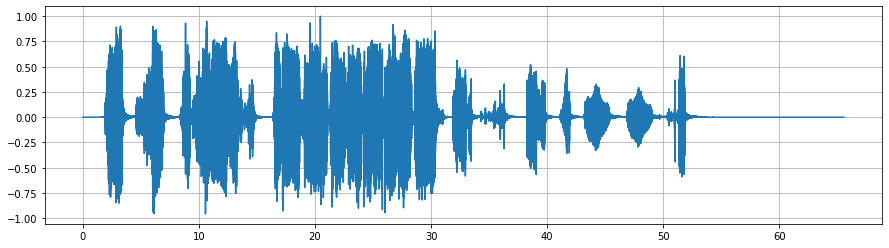

In [52]:
'''After reading numerous journals and tutorials online, 
   including past ECE324 final project reports about MFCC, 
   we decided to use the python librosa package to calculate the MFCC for us
   General steps taken:
      1) Convert YouTube videos into .wav files using youtube-dl package
      2) Normalize the audio data
      3) Convert to MFCC using Librosa package
   See more about the package: https://librosa.org/doc/latest/index.html
'''

import librosa
import librosa.display

def wav_to_mfcc(files):
  audio, sample_rate = librosa.load('temp/'+files)
  audio = normalize_audio(audio)
  mfccs = librosa.feature.mfcc(audio, sample_rate)
  librosa.display.specshow(mfccs, x_axis = 'time')
  plt.colorbar()
  plt.title('Normalized MFCC')
  plt.tight_layout()
  plt.show()
  return mfccs

def plot_wav(files):
  audio, sample_rate = librosa.load('temp/'+files)
  audio = normalize_audio(audio)
  plt.figure(figsize=(15,4))
  plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
  plt.grid(True)
  plt.show()

for files in os.listdir('temp/'):
  print(files)
  wav_to_mfcc(files)
  plot_wav(files)